In [1]:
!pip install plotly

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime, warnings, scipy 

import plotly.offline as py
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots

In [3]:
flight = pd.read_csv("C:/Users/SUMANTH TEJA/Desktop/DATA_603/Project Proposal/flights.csv/flights.csv")

C:\Users\SUMANTH TEJA\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning:

Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.



In [4]:
airlines = pd.read_csv("C:/Users/SUMANTH TEJA/Desktop/DATA_603/Project Proposal/airlines.csv")
airports = pd.read_csv("C:/Users/SUMANTH TEJA/Desktop/DATA_603/Project Proposal/airports.csv")

In [5]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

In [6]:
airports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IATA_CODE  322 non-null    object 
 1   AIRPORT    322 non-null    object 
 2   CITY       322 non-null    object 
 3   STATE      322 non-null    object 
 4   COUNTRY    322 non-null    object 
 5   LATITUDE   319 non-null    float64
 6   LONGITUDE  319 non-null    float64
dtypes: float64(2), object(5)
memory usage: 17.7+ KB


In [7]:
flight.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,5819079.0,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.732926e+06,5.732926e+06,5.730032e+06,5.730032e+06,...,5.819079e+06,5.726566e+06,5.714008e+06,5.819079e+06,5.819079e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06
mean,2015.0,6.524085e+00,1.570459e+01,3.926941e+00,2.173093e+03,1.329602e+03,1.335204e+03,9.370158e+00,1.607166e+01,1.357171e+03,...,1.493808e+03,1.476491e+03,4.407057e+00,2.609863e-03,1.544643e-02,1.348057e+01,7.615387e-02,1.896955e+01,2.347284e+01,2.915290e+00
std,0.0,3.405137e+00,8.783425e+00,1.988845e+00,1.757064e+03,4.837518e+02,4.964233e+02,3.708094e+01,8.895574e+00,4.980094e+02,...,5.071647e+02,5.263197e+02,3.927130e+01,5.102012e-02,1.233201e-01,2.800368e+01,2.143460e+00,4.816164e+01,4.319702e+01,2.043334e+01
min,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.200000e+01,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,-8.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2015.0,4.000000e+00,8.000000e+00,2.000000e+00,7.300000e+02,9.170000e+02,9.210000e+02,-5.000000e+00,1.100000e+01,9.350000e+02,...,1.110000e+03,1.059000e+03,-1.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2015.0,7.000000e+00,1.600000e+01,4.000000e+00,1.690000e+03,1.325000e+03,1.330000e+03,-2.000000e+00,1.400000e+01,1.343000e+03,...,1.520000e+03,1.512000e+03,-5.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00
75%,2015.0,9.000000e+00,2.300000e+01,6.000000e+00,3.230000e+03,1.730000e+03,1.740000e+03,7.000000e+00,1.900000e+01,1.754000e+03,...,1.918000e+03,1.917000e+03,8.000000e+00,0.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,1.900000e+01,2.900000e+01,0.000000e+00
max,2015.0,1.200000e+01,3.100000e+01,7.000000e+00,9.855000e+03,2.359000e+03,2.400000e+03,1.988000e+03,2.250000e+02,2.400000e+03,...,2.400000e+03,2.400000e+03,1.971000e+03,1.000000e+00,1.000000e+00,1.134000e+03,5.730000e+02,1.971000e+03,1.331000e+03,1.211000e+03


In [8]:
flight.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
airports.isnull().sum()

IATA_CODE    0
AIRPORT      0
CITY         0
STATE        0
COUNTRY      0
LATITUDE     3
LONGITUDE    3
dtype: int64

In [10]:
airports = airports.dropna(subset = ["LATITUDE","LONGITUDE"])

In [11]:
airports.isnull().sum()

IATA_CODE    0
AIRPORT      0
CITY         0
STATE        0
COUNTRY      0
LATITUDE     0
LONGITUDE    0
dtype: int64

In [12]:
flight_null = flight.isnull().sum()*100/flight.shape[0]
flight_null

YEAR                    0.000000
MONTH                   0.000000
DAY                     0.000000
DAY_OF_WEEK             0.000000
AIRLINE                 0.000000
FLIGHT_NUMBER           0.000000
TAIL_NUMBER             0.252978
ORIGIN_AIRPORT          0.000000
DESTINATION_AIRPORT     0.000000
SCHEDULED_DEPARTURE     0.000000
DEPARTURE_TIME          1.480526
DEPARTURE_DELAY         1.480526
TAXI_OUT                1.530259
WHEELS_OFF              1.530259
SCHEDULED_TIME          0.000103
ELAPSED_TIME            1.805629
AIR_TIME                1.805629
DISTANCE                0.000000
WHEELS_ON               1.589822
TAXI_IN                 1.589822
SCHEDULED_ARRIVAL       0.000000
ARRIVAL_TIME            1.589822
ARRIVAL_DELAY           1.805629
DIVERTED                0.000000
CANCELLED               0.000000
CANCELLATION_REASON    98.455357
AIR_SYSTEM_DELAY       81.724960
SECURITY_DELAY         81.724960
AIRLINE_DELAY          81.724960
LATE_AIRCRAFT_DELAY    81.724960
WEATHER_DE

In [13]:
flights_New = flight.dropna(subset = ["TAIL_NUMBER",'DEPARTURE_TIME','DEPARTURE_DELAY','TAXI_OUT','WHEELS_OFF','SCHEDULED_TIME',
             'ELAPSED_TIME','AIR_TIME','WHEELS_ON','TAXI_IN','ARRIVAL_TIME','ARRIVAL_DELAY'])

In [14]:
flights_New.isnull().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER                  0
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME               0
DEPARTURE_DELAY              0
TAXI_OUT                     0
WHEELS_OFF                   0
SCHEDULED_TIME               0
ELAPSED_TIME                 0
AIR_TIME                     0
DISTANCE                     0
WHEELS_ON                    0
TAXI_IN                      0
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME                 0
ARRIVAL_DELAY                0
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5714008
AIR_SYSTEM_DELAY       4650569
SECURITY_DELAY         4650569
AIRLINE_DELAY          4650569
LATE_AIRCRAFT_DELAY    4650569
WEATHER_DELAY          4650569
dtype: int64

In [16]:
flights_New1 = flights_New.dropna(subset = ['AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY'])
flights_New1 = flights_New1.drop(['YEAR','MONTH','DAY','DAY_OF_WEEK','TAIL_NUMBER','SCHEDULED_DEPARTURE','DEPARTURE_TIME','SCHEDULED_TIME',
                     'SCHEDULED_ARRIVAL','ARRIVAL_TIME','DIVERTED','CANCELLED','CANCELLATION_REASON','FLIGHT_NUMBER','WHEELS_OFF',
                     'WHEELS_ON','AIR_TIME'],axis = 1)
flights_New1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1063439 entries, 27 to 5819071
Data columns (total 14 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   AIRLINE              1063439 non-null  object 
 1   ORIGIN_AIRPORT       1063439 non-null  object 
 2   DESTINATION_AIRPORT  1063439 non-null  object 
 3   DEPARTURE_DELAY      1063439 non-null  float64
 4   TAXI_OUT             1063439 non-null  float64
 5   ELAPSED_TIME         1063439 non-null  float64
 6   DISTANCE             1063439 non-null  int64  
 7   TAXI_IN              1063439 non-null  float64
 8   ARRIVAL_DELAY        1063439 non-null  float64
 9   AIR_SYSTEM_DELAY     1063439 non-null  float64
 10  SECURITY_DELAY       1063439 non-null  float64
 11  AIRLINE_DELAY        1063439 non-null  float64
 12  LATE_AIRCRAFT_DELAY  1063439 non-null  float64
 13  WEATHER_DELAY        1063439 non-null  float64
dtypes: float64(10), int64(1), object(3)
memory usage:

In [17]:
Flight_Delays = flights_New1

In [18]:
flights_2 = flights_New.drop(['CANCELLATION_REASON','AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY',
                    'LATE_AIRCRAFT_DELAY','WEATHER_DELAY'],axis = 1)
flights_2.isnull().sum()

YEAR                   0
MONTH                  0
DAY                    0
DAY_OF_WEEK            0
AIRLINE                0
FLIGHT_NUMBER          0
TAIL_NUMBER            0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_TIME         0
DEPARTURE_DELAY        0
TAXI_OUT               0
WHEELS_OFF             0
SCHEDULED_TIME         0
ELAPSED_TIME           0
AIR_TIME               0
DISTANCE               0
WHEELS_ON              0
TAXI_IN                0
SCHEDULED_ARRIVAL      0
ARRIVAL_TIME           0
ARRIVAL_DELAY          0
DIVERTED               0
CANCELLED              0
dtype: int64

In [19]:
flights_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5714008 entries, 0 to 5819078
Data columns (total 25 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

In [20]:
flights_2.DEPARTURE_TIME.tail(10)

5819069     238.0
5819070    2359.0
5819071      15.0
5819072       6.0
5819073      15.0
5819074    2355.0
5819075    2355.0
5819076    2350.0
5819077    2353.0
5819078      14.0
Name: DEPARTURE_TIME, dtype: float64

In [21]:
def Format_Hourmin(hours):
        if hours == 2400:
            hours = 0
        else:
            hours = "{0:04d}".format(int(hours))
            Hourmin = datetime.time(int(hours[0:2]), int(hours[2:4]))
            return Hourmin

In [23]:
flights_2['Actual_Departure'] =flights_New['DEPARTURE_TIME'].apply(Format_Hourmin)
flights_2['Actual_Departure'].tail(10)

5819069    02:38:00
5819070    23:59:00
5819071    00:15:00
5819072    00:06:00
5819073    00:15:00
5819074    23:55:00
5819075    23:55:00
5819076    23:50:00
5819077    23:53:00
5819078    00:14:00
Name: Actual_Departure, dtype: object

In [24]:
flights_2.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'Actual_Departure'],
      dtype='object')

In [25]:
flights_2['DATE'] = pd.to_datetime(flights_2[['YEAR','MONTH','DAY']])
flights_2.DATE.tail(10)

5819069   2015-12-31
5819070   2015-12-31
5819071   2015-12-31
5819072   2015-12-31
5819073   2015-12-31
5819074   2015-12-31
5819075   2015-12-31
5819076   2015-12-31
5819077   2015-12-31
5819078   2015-12-31
Name: DATE, dtype: datetime64[ns]

In [26]:
flights_2['Actual_Departure'] =flights_2['DEPARTURE_TIME'].apply(Format_Hourmin)
flights_2['Scheduled_Arrival'] =flights_2['SCHEDULED_ARRIVAL'].apply(Format_Hourmin)
flights_2['Scheduled_Departure'] =flights_2['SCHEDULED_DEPARTURE'].apply(Format_Hourmin)
flights_2['Actual_Arrival'] =flights_2['ARRIVAL_TIME'].apply(Format_Hourmin)

In [27]:
flights_2 = flights_2.merge(airlines, left_on='AIRLINE', right_on='IATA_CODE', how='inner')

In [28]:
flights_2 = flights_2.drop(['AIRLINE_x','IATA_CODE'], axis=1)
flights_2 = flights_2.rename(columns={"AIRLINE_y":"AIRLINE"})

In [29]:
flights_2 = flights_2.merge(airports, left_on='ORIGIN_AIRPORT', right_on='IATA_CODE', how='inner')
flights_2 = flights_2.merge(airports, left_on='DESTINATION_AIRPORT', right_on='IATA_CODE', how='inner')

In [30]:
flights_2.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'FLIGHT_NUMBER', 'TAIL_NUMBER',
       'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE',
       'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON',
       'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY',
       'DIVERTED', 'CANCELLED', 'Actual_Departure', 'DATE',
       'Scheduled_Arrival', 'Scheduled_Departure', 'Actual_Arrival', 'AIRLINE',
       'IATA_CODE_x', 'AIRPORT_x', 'CITY_x', 'STATE_x', 'COUNTRY_x',
       'LATITUDE_x', 'LONGITUDE_x', 'IATA_CODE_y', 'AIRPORT_y', 'CITY_y',
       'STATE_y', 'COUNTRY_y', 'LATITUDE_y', 'LONGITUDE_y'],
      dtype='object')

In [31]:
flights_2 = flights_2.drop(['LATITUDE_x', 'LONGITUDE_x',
       'STATE_y', 'COUNTRY_y', 'LATITUDE_y', 'LONGITUDE_y','STATE_x', 'COUNTRY_x'], axis=1)
flights_2 = flights_2.rename(columns={'IATA_CODE_x':'Org_Airport_Code','AIRPORT_x':'Org_Airport_Name','CITY_x':'Origin_city',
                             'IATA_CODE_y':'Dest_Airport_Code','AIRPORT_y':'Dest_Airport_Name','CITY_y':'Destination_city'})
flights_2

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,...,Scheduled_Arrival,Scheduled_Departure,Actual_Arrival,AIRLINE,Org_Airport_Code,Org_Airport_Name,Origin_city,Dest_Airport_Code,Dest_Airport_Name,Destination_city
0,2015,1,1,4,98,N407AS,ANC,SEA,5,2354.0,...,04:30:00,00:05:00,04:08:00,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,SEA,Seattle-Tacoma International Airport,Seattle
1,2015,1,1,4,108,N309AS,ANC,SEA,45,41.0,...,05:09:00,00:45:00,04:55:00,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,SEA,Seattle-Tacoma International Airport,Seattle
2,2015,1,1,4,134,N464AS,ANC,SEA,155,140.0,...,06:33:00,01:55:00,05:58:00,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,SEA,Seattle-Tacoma International Airport,Seattle
3,2015,1,1,4,114,N303AS,ANC,SEA,220,209.0,...,06:40:00,02:20:00,06:28:00,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,SEA,Seattle-Tacoma International Airport,Seattle
4,2015,1,1,4,730,N423AS,ANC,SEA,505,457.0,...,09:30:00,05:05:00,09:16:00,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,SEA,Seattle-Tacoma International Airport,Seattle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5221995,2015,12,29,2,2734,N884AS,MEI,PIB,2046,2037.0,...,21:20:00,20:46:00,21:02:00,Atlantic Southeast Airlines,MEI,Meridian Regional Airport,Meridian,PIB,Hattiesburg-Laurel Regional Airport,Hattiesburg-Laurel
5221996,2015,12,30,3,2730,N880AS,MEI,PIB,1435,1616.0,...,15:09:00,14:35:00,16:39:00,Atlantic Southeast Airlines,MEI,Meridian Regional Airport,Meridian,PIB,Hattiesburg-Laurel Regional Airport,Hattiesburg-Laurel
5221997,2015,12,30,3,2734,N907EV,MEI,PIB,2046,2056.0,...,21:20:00,20:46:00,21:30:00,Atlantic Southeast Airlines,MEI,Meridian Regional Airport,Meridian,PIB,Hattiesburg-Laurel Regional Airport,Hattiesburg-Laurel
5221998,2015,12,31,4,2730,N907EV,MEI,PIB,1435,1421.0,...,15:09:00,14:35:00,14:51:00,Atlantic Southeast Airlines,MEI,Meridian Regional Airport,Meridian,PIB,Hattiesburg-Laurel Regional Airport,Hattiesburg-Laurel


# DATA VISULIZATION

In [32]:
F=flights_2.Org_Airport_Name.value_counts().sort_values(ascending=False)[:20]
print(F)

Hartsfield-Jackson Atlanta International Airport                          341497
Chicago O'Hare International Airport                                      276554
Dallas/Fort Worth International Airport                                   232647
Denver International Airport                                              193402
Los Angeles International Airport                                         192003
Phoenix Sky Harbor International Airport                                  145552
San Francisco International Airport                                       145491
George Bush Intercontinental Airport                                      143484
McCarran International Airport                                            131937
Minneapolis-Saint Paul International Airport                              111055
Seattle-Tacoma International Airport                                      110178
Orlando International Airport                                             109532
Detroit Metropolitan Airport

In [33]:
F=flights_2.Org_Airport_Name.value_counts().sort_values(ascending=False)[:15]
label=F.index
size=F.values
colors = ['skyblue', '#FEBFB3', '#96D38C', '#D0F9B1', 'gold', 'orange', 'lightgrey', 
          'lightblue','lightgreen','aqua','yellow','#D4E157','#D1C4E9','#1A237E','#64B5F6','#009688',
          '#1DE9B6','#66BB6A','#689F38','#FFB300']
trace =go.Pie(labels=label, values=size, marker=dict(colors=colors), hole=.1)
data = [trace]
layout = go.Layout(title='Origin Airport Distribution')
fig=go.Figure(data=data,layout=layout)
py.iplot(fig)

In [34]:
F=flights_2.Origin_city.value_counts().sort_values(ascending=False)[:15]
print(F)

Chicago              355239
Atlanta              341497
Dallas-Fort Worth    232647
Houston              194130
Denver               193402
Los Angeles          192003
New York             186497
Phoenix              145552
San Francisco        145491
Las Vegas            131937
Minneapolis          111055
Seattle              110178
Orlando              109532
Detroit              106992
Boston               104804
Name: Origin_city, dtype: int64


In [35]:
F=flights_2.Destination_city.value_counts().sort_values(ascending=False)[:15]
print(F)

Chicago              354342
Atlanta              341065
Dallas-Fort Worth    231764
Houston              193585
Denver               193033
Los Angeles          192136
New York             186114
San Francisco        145409
Phoenix              145378
Las Vegas            132124
Minneapolis          111146
Seattle              110192
Orlando              109546
Detroit              106969
Boston               105052
Name: Destination_city, dtype: int64


In [36]:
F=flights_2.Origin_city.value_counts().sort_values(ascending=False)[:15]

trace1 = go.Bar(x=F.index,y=F.values,marker=dict(color = '#009688'))
                                                      
F = flights_2.Destination_city.value_counts().sort_values(ascending=False)[:15]

trace2 = go.Bar(x=F.index, y=F.values, marker=dict( color ='#689F38' ))
 
fig = make_subplots(rows=1, cols=2, subplot_titles=('Origin City','Destination City'))                                                        
 
fig.add_trace(trace1, 1,1) 
fig.add_trace(trace2, 1,2)  
fig['layout'].update(yaxis = dict(title = 'Values'), height=500, width=900, showlegend=False)
py.iplot(fig)      

In [37]:
F=flights_2.AIRLINE.value_counts().sort_values(ascending=False)[:7]
print(F)

Southwest Airlines Co.          1135152
Delta Air Lines Inc.             791067
American Airlines Inc.           636554
Skywest Airlines Inc.            528328
Atlantic Southeast Airlines      508288
United Air Lines Inc.            462086
American Eagle Airlines Inc.     257130
Name: AIRLINE, dtype: int64


In [38]:
F=flights_2.AIRLINE.value_counts().sort_values(ascending=True)[:7]
print(F)

Virgin America             55813
Hawaiian Airlines Inc.     69815
Frontier Airlines Inc.     81715
Spirit Air Lines          104500
Alaska Airlines Inc.      157025
US Airways Inc.           194223
JetBlue Airways           240304
Name: AIRLINE, dtype: int64


In [39]:
F=flights_2.AIRLINE.value_counts().sort_values(ascending=False)[:8]
trace1 = go.Scatter(x=F.index, y=F.values,name='Most Flights',marker=dict(color='blue'))

F=flights_2.AIRLINE.value_counts().sort_values(ascending=True)[:7].iloc[::-1]
trace2 = go.Scatter(x=F.index, y=F.values,name='Least Flights',marker=dict(color='yellow'))

data=[trace1,trace2]
layout = dict(title = 'Airline distribution')
fig = dict(data=data,layout = layout)
py.iplot(fig)

In [40]:
F=flights_2.MONTH.value_counts().to_frame().reset_index().sort_values(by='index')
F.columns=['Month','Flight_Values']
print(F)

    Month  Flight_Values
9       1         456457
10      2         407172
3       3         491227
5       4         478321
4       5         488696
2       6         491890
0       7         513340
1       8         502960
8       9         461365
7      11         461599
6      12         468973


In [41]:
F=flights_2.MONTH.value_counts().to_frame().reset_index().sort_values(by='index')
F.columns=['Month','Flight_Values']
Month={1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May',6: 'Jun',
       7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
F.Month=F.Month.map(Month)
colors = ['skyblue', '#FEBFB3', '#96D38C', '#D0F9B1','lightblue','lightgreen',
          'aqua','yellow','#D4E157','#D1C4E9','#1A237E','#64B5F6']
trace=go.Bar(x=F.Month,y=F.Flight_Values,marker=dict(color=colors))
data=[trace]
layout = go.Layout(title='Monthly Flights',yaxis=dict(title='Flights Value'),height=500, width=800)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)   

In [42]:
Flight_Valume=flights_2.pivot_table(index='Origin_city',columns='DAY_OF_WEEK',values='DAY',aggfunc=lambda x:x.count())
F=Flight_Valume.sort_values(by=1,ascending=False)[:7]
print(F)

DAY_OF_WEEK              1        2        3        4        5        6  \
Origin_city                                                               
Atlanta            51379.0  50256.0  50751.0  50321.0  50052.0  39931.0   
Chicago            51342.0  53294.0  53814.0  52881.0  52705.0  41499.0   
Dallas-Fort Worth  33973.0  34150.0  34328.0  34247.0  33946.0  29051.0   
Houston            29377.0  27819.0  28862.0  29233.0  29050.0  22320.0   
Denver             29007.0  27775.0  28722.0  28702.0  28319.0  23076.0   
Los Angeles        28521.0  27788.0  28142.0  28410.0  28019.0  23805.0   
New York           27623.0  27457.0  28391.0  28104.0  28072.0  20878.0   

DAY_OF_WEEK              7  
Origin_city                 
Atlanta            48807.0  
Chicago            49704.0  
Dallas-Fort Worth  32952.0  
Houston            27469.0  
Denver             27801.0  
Los Angeles        27318.0  
New York           25972.0  


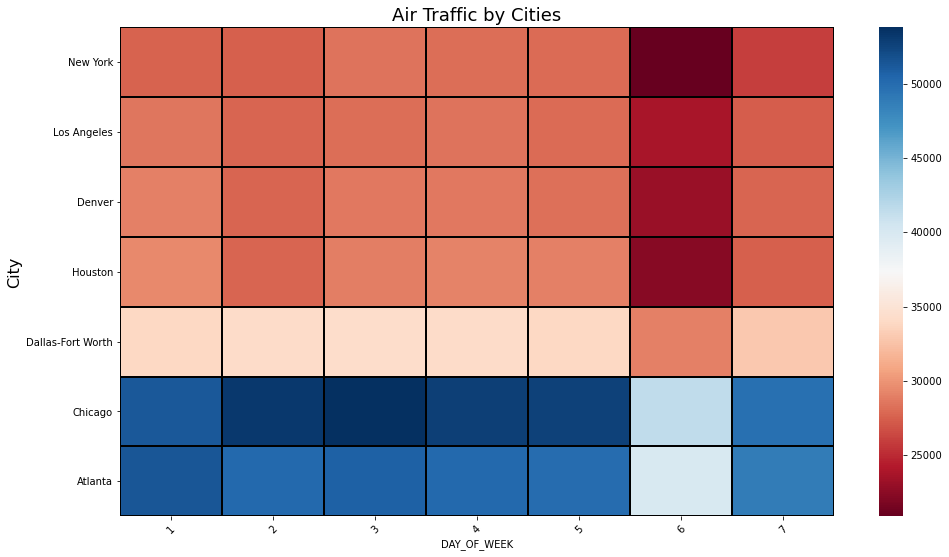

In [43]:
Flight_Valume=flights_2.pivot_table(index='Origin_city',columns='DAY_OF_WEEK',values='DAY',aggfunc=lambda x:x.count())
F=Flight_Valume.sort_values(by=1,ascending=False)[:7]
F=F.iloc[::-1]
fig = plt.figure(figsize=(16,9))
sns.heatmap(F, cmap='RdBu', linecolor='black', linewidths=1)
plt.title('Air Traffic by Cities',size=18)
plt.ylabel('City',size=16)
plt.xticks(rotation=45)
plt.show()

In [44]:
F=flights_2.groupby('AIRLINE').DEPARTURE_DELAY.mean().to_frame().sort_values(by='DEPARTURE_DELAY',ascending=False).round(3)
print(F)

                              DEPARTURE_DELAY
AIRLINE                                      
Spirit Air Lines                       16.629
United Air Lines Inc.                  15.024
Frontier Airlines Inc.                 14.219
JetBlue Airways                        11.753
Southwest Airlines Co.                 10.938
American Eagle Airlines Inc.           10.523
American Airlines Inc.                  9.254
Virgin America                          9.179
Atlantic Southeast Airlines             8.979
Skywest Airlines Inc.                   8.112
Delta Air Lines Inc.                    7.710
US Airways Inc.                         6.081
Alaska Airlines Inc.                    1.892
Hawaiian Airlines Inc.                  0.497


In [45]:
F=flights_2.groupby('AIRLINE').ARRIVAL_DELAY.mean().to_frame().sort_values(by='ARRIVAL_DELAY',ascending=False).round(3)
print(F)

                              ARRIVAL_DELAY
AIRLINE                                    
Spirit Air Lines                     15.226
Frontier Airlines Inc.               13.759
American Eagle Airlines Inc.          7.317
Atlantic Southeast Airlines           6.981
JetBlue Airways                       6.949
Skywest Airlines Inc.                 6.221
United Air Lines Inc.                 6.211
Virgin America                        4.980
Southwest Airlines Co.                4.846
American Airlines Inc.                3.935
US Airways Inc.                       3.706
Hawaiian Airlines Inc.                2.162
Delta Air Lines Inc.                  0.675
Alaska Airlines Inc.                 -0.791


In [48]:
F=flights_2.groupby('AIRLINE').DEPARTURE_DELAY.mean().to_frame().sort_values(by='DEPARTURE_DELAY',ascending=False).round(3)
trace1=go.Bar(x=F.index, y=F.DEPARTURE_DELAY ,name='DEPARTURE_DELAY', marker=dict(color='navy'))
F=flights_2.groupby('AIRLINE').ARRIVAL_DELAY.mean().to_frame().sort_values(by='ARRIVAL_DELAY',ascending=False).round(3)
trace2=go.Bar(x=F.index, y=F.ARRIVAL_DELAY, name='ARRIVAL_DELAY', marker=dict(color='red'))
data=[trace1, trace2]
layout= go.Layout(xaxis=dict(tickangle=90),title='Mean Arrival & Departure Delay by Airlines', yaxis=dict(title='Minute'), barmode='stack')
fig=go.Figure(data=data, layout=layout)
py.iplot(fig)

In [49]:
flights_2['Delay_Difference'] = flights_2['DEPARTURE_DELAY'] - flights_2['ARRIVAL_DELAY']
F=flights_2.groupby('AIRLINE').Delay_Difference.mean().to_frame().sort_values(by='Delay_Difference', ascending=False).round(3)
print(F)

                              Delay_Difference
AIRLINE                                       
United Air Lines Inc.                    8.812
Delta Air Lines Inc.                     7.035
Southwest Airlines Co.                   6.093
American Airlines Inc.                   5.319
JetBlue Airways                          4.804
Virgin America                           4.200
American Eagle Airlines Inc.             3.207
Alaska Airlines Inc.                     2.683
US Airways Inc.                          2.375
Atlantic Southeast Airlines              1.999
Skywest Airlines Inc.                    1.891
Spirit Air Lines                         1.403
Frontier Airlines Inc.                   0.460
Hawaiian Airlines Inc.                  -1.665


In [50]:
flights_2['Delay_Difference'] = flights_2['DEPARTURE_DELAY'] - flights_2['ARRIVAL_DELAY']
F=flights_2.groupby('AIRLINE').Delay_Difference.mean().to_frame().sort_values(by='Delay_Difference', ascending=False).round(3)
trace=go.Bar(x=F.index, y=F.Delay_Difference, marker=dict(color = F.Delay_Difference, colorscale='Cividis',showscale=True))
data=[trace]
layout = go.Layout(xaxis=dict(tickangle=45),title='Mean (Departure Delay - Arrival Delay) by Airlines', yaxis = dict(title = 'Minute'))
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)      